In [3]:
import tensorflow as tf
import numpy as np                      
import pandas as pd                     
import matplotlib.pyplot as plt         
import seaborn as sns   

In [2]:
print(tf.__version__)

2.10.0


# Preprocessing

In [5]:
# import library
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
#loading datasets
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= 20000)

In [8]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [10]:
#apply padding
X_train = pad_sequences (X_train , maxlen =100)
X_test = pad_sequences (X_test , maxlen =100)

In [11]:
X_train.shape , X_test.shape

((25000, 100), (25000, 100))

# Build Model

In [17]:
model = tf.keras.models.Sequential()

In [18]:
model.add (tf.keras.layers.Embedding(input_dim = 20000,
    output_dim = 128,input_length=100))

In [20]:
model.add (tf.keras.layers.LSTM (units = 128, recurrent_activation="tanh"))

In [21]:
model.add(tf.keras.layers.Dense(units = 1 , activation="sigmoid"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer="rmsprop", loss='binary_crossentropy',metrics= ['accuracy'])

# Train Model

In [39]:
history = model.fit (X_train, y_train, epochs = 5, batch_size = 128 , validation_data = (X_test, y_test))

Epoch 1/5
196/196 [==============================] - 72s 366ms/step - loss: 0.0573 - accuracy: 0.9799 - val_loss: 0.6492 - val_accuracy: 0.8311
Epoch 2/5
196/196 [==============================] - 71s 360ms/step - loss: 0.0439 - accuracy: 0.9844 - val_loss: 0.6437 - val_accuracy: 0.8294
Epoch 3/5
196/196 [==============================] - 73s 370ms/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.6773 - val_accuracy: 0.8111
Epoch 4/5
196/196 [==============================] - 69s 355ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.8277 - val_accuracy: 0.8230
Epoch 5/5
196/196 [==============================] - 70s 356ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.8142 - val_accuracy: 0.8260


In [40]:
y_pred = model.predict(X_test)
y_pred

782/782 [==============================] - 30s 38ms/step


array([[9.5819640e-01],
       [9.9999166e-01],
       [7.7044988e-01],
       ...,
       [9.5292920e-04],
       [9.1763872e-01],
       [1.1429419e-01]], dtype=float32)

In [41]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

50.0

In [43]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_test, y_pred)

array([[12500,     0],
       [12500,     0]])

# Curve

Text(0.5, 1.0, 'Loss - Epochs')

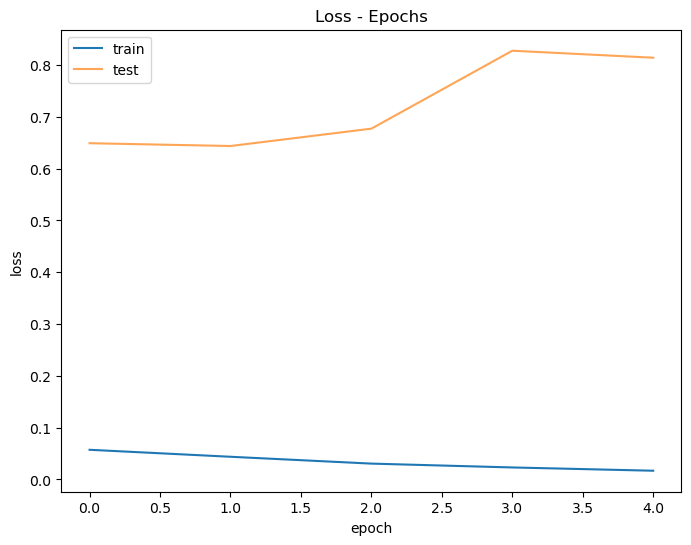

In [44]:
plt.figure(figsize = (8, 6))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Loss - Epochs')

Text(0.5, 1.0, 'Base Model: Accuracy - Epochs')

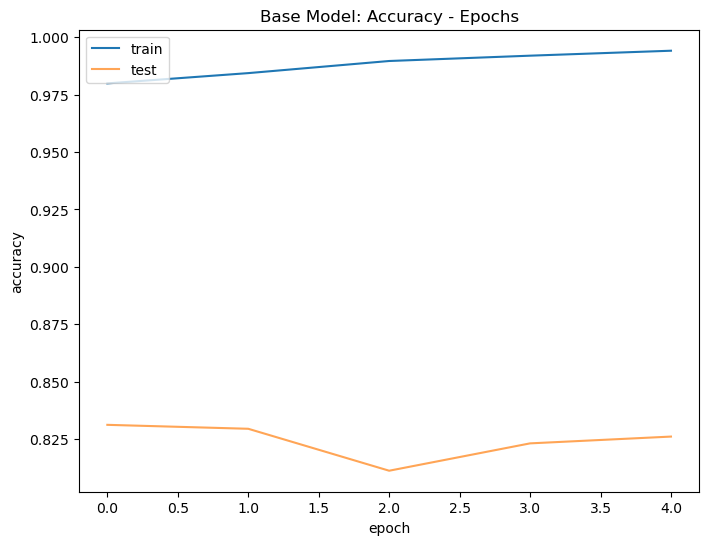

In [45]:
plt.figure(figsize = (8, 6))
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Base Model: Accuracy - Epochs')

In [46]:
def learning_curve(history,epoch):
    epoch_range = range (1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.title('Base Model: Accuracy - Epochs')
    plt.show()
    
    
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.title('Base Model: Loss - Epochs')
    plt.show()



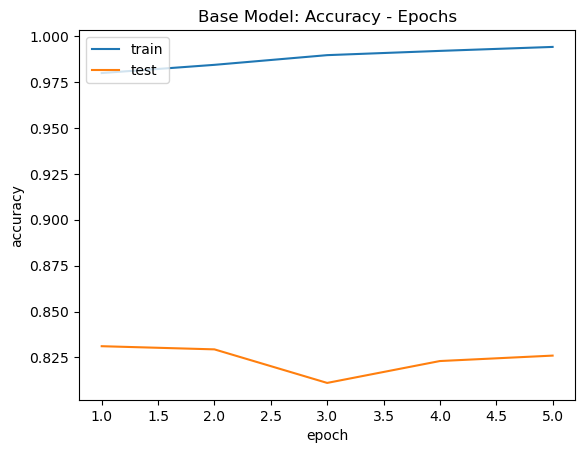

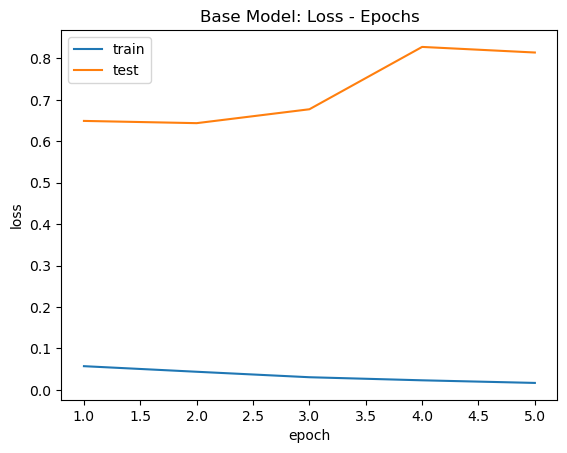

In [47]:
learning_curve(history,5)